In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set()

In [12]:
os_path = os.getcwd()

In [14]:
weather_df = pd.read_csv(os_path+'\\data\\avg_temp.csv')

In [16]:
weather_df.index = weather_df['day']
weather_sofia = weather_df['София']

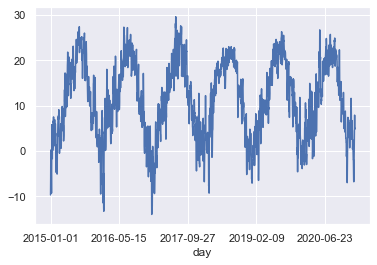

In [19]:
weather_sofia.plot();

In [20]:
weather_sofia.to_pickle('sofiaweather.pkl')

In [21]:
import glob

In [33]:
os.chdir(os_path+'\\data')

In [44]:
list_data = glob.glob('*00.csv')

In [45]:
list_data

['Total Load - Day Ahead _ Actual_201501010000-201601010000.csv',
 'Total Load - Day Ahead _ Actual_201601010000-201701010000.csv',
 'Total Load - Day Ahead _ Actual_201701010000-201801010000.csv',
 'Total Load - Day Ahead _ Actual_201801010000-201901010000.csv',
 'Total Load - Day Ahead _ Actual_201901010000-202001010000.csv',
 'Total Load - Day Ahead _ Actual_202001010000-202101010000.csv',
 'Total Load - Day Ahead _ Actual_202101010000-202201010000.csv']

In [46]:
import datetime as dt
df = pd.DataFrame()

for files in list_data:
    df1 = pd.read_csv(files)
    df1['Time (CET)'] = [item.split(' - ')[0] for item in df1['Time (CET)']]
    df1.index = [dt.datetime.strptime(item, "%d.%m.%Y %H:%M") for item in df1['Time (CET)']]
    df = pd.concat([df, df1], axis=0)
    
df = df.replace('-', np.nan)
df.columns = ['Time', 'Forecast', 'Load']
df = df.dropna(subset = ['Load'])
df = df.drop('Time', axis=1)
df['Load'] = pd.to_numeric(df['Load'])
df['Forecast'] = pd.to_numeric(df['Forecast'])

In [47]:
df.head()

,Forecast,Load
2015-01-01 00:00:00,NaN,5024.0
2015-01-01 01:00:00,NaN,4773.0
2015-01-01 02:00:00,NaN,4585.0
2015-01-01 03:00:00,NaN,4440.0
2015-01-01 04:00:00,NaN,4418.0


In [48]:
df.tail()

,Forecast,Load
2021-01-25 23:00:00,4264.0,4051.0
2021-01-26 00:00:00,4022.0,3864.0
2021-01-26 01:00:00,3914.0,3755.0
2021-01-26 02:00:00,3878.0,3619.0
2021-01-26 03:00:00,3927.0,3625.0


In [49]:
df.to_pickle('energycons.pkl')